# Preparing the dataset for hippocampus segmentation

In this notebook you will use the skills and methods that we have talked about during our EDA Lesson to prepare the hippocampus dataset using Python. Follow the Notebook, writing snippets of code where directed so using Task comments, similar to the one below, which expects you to put the proper imports in place. Write your code directly in the cell with TASK comment. Feel free to add cells as you see fit, but please make sure that code that performs that tasked activity sits in the same cell as the Task comment.


In [1]:
# TASK: Import the following libraries that we will use: nibabel, matplotlib, numpy
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.ndimage as nd
import shutil

It will help your understanding of the data a lot if you were able to use a tool that allows you to view NIFTI volumes, like [3D Slicer](https://www.slicer.org/). I will refer to Slicer throughout this Notebook and will be pasting some images showing what your output might look like.

## Loading NIFTI images using NiBabel

NiBabel is a python library for working with neuro-imaging formats (including NIFTI) that we have used in some of the exercises throughout the course. Our volumes and labels are in NIFTI format, so we will use nibabel to load and inspect them.

NiBabel documentation could be found here: https://nipy.org/nibabel/

Our dataset sits in two directories - *images* and *labels*. Each image is represented by a single file (we are fortunate to have our data converted to NIFTI) and has a corresponding label file which is named the same as the image file.

Note that our dataset is "dirty". There are a few images and labels that are not quite right. They should be quite obvious to notice, though. The dataset contains an equal amount of "correct" volumes and corresponding labels, and you don't need to alter values of any samples in order to get the clean dataset.

In [117]:
! ls /data/
! ls /data/TrainingSet
! ls /data/TestVolumes

TestVolumes  TrainingSet
images	labels
Study1	Study2	Study3


In [2]:
! ls /data/TrainingSet/images

hippocampus_001.nii.gz	hippocampus_145.nii.gz	hippocampus_276.nii.gz
hippocampus_003.nii.gz	hippocampus_146.nii.gz	hippocampus_277.nii.gz
hippocampus_004.nii.gz	hippocampus_148.nii.gz	hippocampus_279.nii.gz
hippocampus_006.nii.gz	hippocampus_149.nii.gz	hippocampus_280.nii.gz
hippocampus_007.nii.gz	hippocampus_150.nii.gz	hippocampus_281.nii.gz
hippocampus_008.nii.gz	hippocampus_152.nii.gz	hippocampus_282.nii.gz
hippocampus_010.nii.gz	hippocampus_154.nii.gz	hippocampus_286.nii.gz
hippocampus_011.nii.gz	hippocampus_155.nii.gz	hippocampus_287.nii.gz
hippocampus_014.nii.gz	hippocampus_156.nii.gz	hippocampus_288.nii.gz
hippocampus_015.nii.gz	hippocampus_157.nii.gz	hippocampus_289.nii.gz
hippocampus_017.nii.gz	hippocampus_158.nii.gz	hippocampus_290.nii.gz
hippocampus_019.nii.gz	hippocampus_160.nii.gz	hippocampus_292.nii.gz
hippocampus_020.nii.gz	hippocampus_161.nii.gz	hippocampus_294.nii.gz
hippocampus_023.nii.gz	hippocampus_162.nii.gz	hippocampus_295.nii.gz
hippocampus_024.nii.gz	hippocampus

In [3]:
len(os.listdir('/data/TrainingSet/images')), len(os.listdir('/data/TrainingSet/labels'))

(263, 262)

Create an array to store which files we aren't going to use.

In [61]:
remove = []

There's an image for which there's no label! Create the images list with images that have labels.

In [62]:
dir_training_images = os.listdir('/data/TrainingSet/images')
dir_training_labels = os.listdir('/data/TrainingSet/labels')

In [63]:
# TASK: Your data sits in directory /data/TrainingSet.
# Load an image and a segmentation mask into variables called image and label

# only load image if a label for it exists
images = {}

for filename in dir_training_images:
    if filename in dir_training_labels:
        images[filename] = nib.load(os.path.join('/data/TrainingSet/images', filename))
    else:
        remove.append(filename)

labels = {filename: nib.load(os.path.join('/data/TrainingSet/labels', filename)) 
          for filename in dir_training_labels}

# same length
len(images), len(labels)

(262, 262)

In [64]:
remove

['hippocampus_118.nii.gz']

In [66]:
# Nibabel can present your image data as a Numpy array by calling the method get_fdata()
# The array will contain a multi-dimensional Numpy array with numerical values representing voxel intensities. 
# In our case, images and labels are 3-dimensional, so get_fdata will return a 3-dimensional array. You can verify this
# by accessing the .shape attribute. What are the dimensions of the input arrays?
file = "hippocampus_001.nii.gz"

img = images[file].get_fdata()
print('image shape', img.shape)

# the second (index 1) dimension is the sagittal plane, 
# the third (index 2) dimension is the coronal plane
# and the forth (index 3) dimension is the axial plane.
images[file].header["dim"]

image shape (35, 51, 35)


array([ 3, 35, 51, 35,  1,  1,  1,  1], dtype=int16)

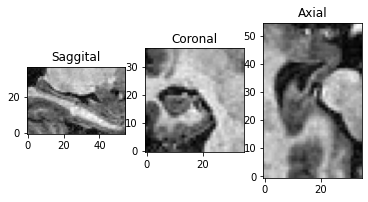

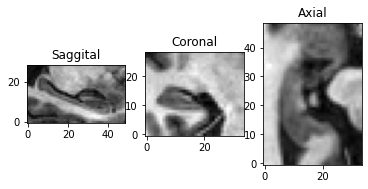

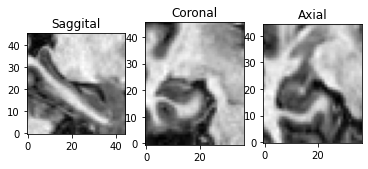

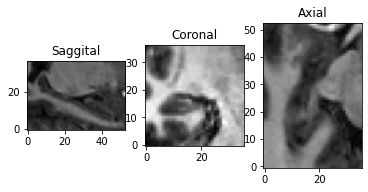

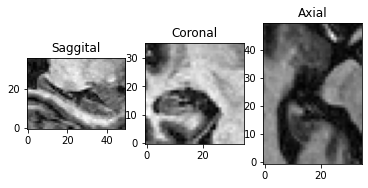

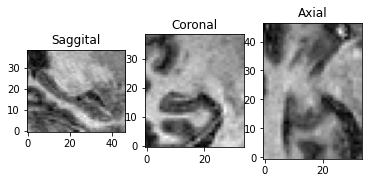

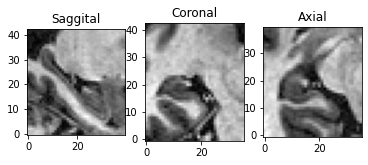

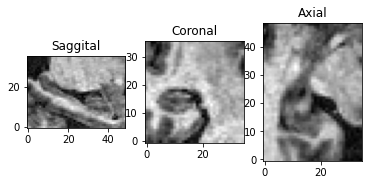

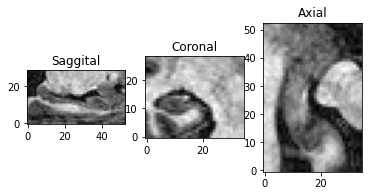

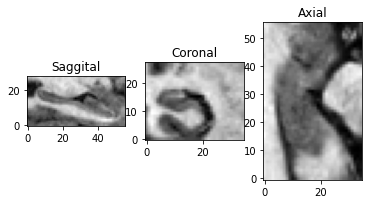

In [67]:
# TASK: using matplotlib, visualize a few slices from the dataset, along with their labels. 
# You can adjust plot sizes like so if you find them too small:

figure = None
for i in range(10):
    figure, axes = plt.subplots(1, 3);
    image = images[dir_training_images[i]].get_fdata()
    sag_slice = image[image.shape[0]//2,:,:]
    cor_slice = image[:,image.shape[1]//2,:]
    ax_slice = image[:,:,image.shape[2]//2]
    
    axes[0].set_title('Saggital')
    axes[0].imshow(sag_slice.T, cmap="gray", origin="lower");    
    
    axes[1].set_title('Coronal')
    axes[1].imshow(cor_slice.T, cmap="gray", origin="lower");       
    
    axes[2].set_title('Axial')
    axes[2].imshow(ax_slice.T, cmap="gray", origin="lower");  

Load volume into 3D Slicer to validate that your visualization is correct and get a feel for the shape of structures.Try to get a visualization like the one below (hint: while Slicer documentation is not particularly great, there are plenty of YouTube videos available! Just look it up on YouTube if you are not sure how to do something)

![3D slicer](img/Slicer.png)

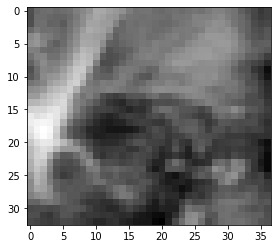

In [70]:
# Stand out suggestion: use one of the simple Volume Rendering algorithms that we've
# implemented in one of our earlier lessons to visualize some of these volumes

visualized_img = images[dir_training_images[21]].get_fdata()

vr = np.zeros((visualized_img.shape[0], visualized_img .shape[2]))

for z in range (visualized_img.shape[1]):
    vr += visualized_img [:,z,:]
    
plt.imshow(nd.rotate(vr, 90), cmap="gray")

## Looking at single image data
In this section we will look closer at the NIFTI representation of our volumes. In order to measure the physical volume of hippocampi, we need to understand the relationship between the sizes of our voxels and the physical world.

In [84]:
# Nibabel supports many imaging formats, NIFTI being just one of them. I told you that our images 
# are in NIFTI, but you should confirm if this is indeed the format that we are dealing with
# TASK: using .header attribute - what is the format of our images?

# indeed, this is a Nifti 1 header, thus it is a nifti image.
single_image = images[dir_training_images[0]]
single_image.header

Further down we will be inspecting .header attribute that provides access to NIFTI metadata. You can use this resource as a reference for various fields: https://brainder.org/2012/09/23/the-nifti-file-format/

In [75]:
# TASK: How many bits per pixel are used?
np.unique([images[img].header['bitpix'] for img in images])

array([ 8, 32], dtype=int16)

There are 207 32-bit images and 55 8-bit images.

In [78]:
from collections import Counter
count = Counter()
for img in images:
    count[images[img].header['bitpix'].item()] += 1
count

Counter({32: 207, 8: 55})

In [79]:
# TASK: What are the units of measurement?
np.unique([images[img].header['xyzt_units'] for img in images])

array([10], dtype=uint8)

In [85]:
# TASK: Do we have a regular grid? What are grid spacings?
# we have a regular grid since the grid spacing is all the same
single_image.header['pixdim']

array([1., 1., 1., 1., 1., 0., 0., 0.], dtype=float32)

In [81]:
# these are the two images with irregular spacing
for im in images:
    if images[im].header['pixdim'][1] != 1:
        print('irregular spacing for file', im)
        print(images[im].header['pixdim'])
        remove.append(im)

irregular spacing for file hippocampus_281.nii.gz
[1.       0.785156 0.785156 7.5      0.       0.       0.       0.      ]
irregular spacing for file hippocampus_010.nii.gz
[-1.        0.597656  0.597656  1.25      0.        0.        0.
  0.      ]


In [82]:
remove

['hippocampus_118.nii.gz', 'hippocampus_281.nii.gz', 'hippocampus_010.nii.gz']

TASK: What dimensions represent axial, sagittal, and coronal slices? How do you know?

Axial: 3

Coronal: 2

Sagittal: 1
    
This is because for the "dim" attribute of the header, dimension 1 is sagittal, dimension 2 is coronal, dimension 3 is axial (if counting from dimension 0). The shape of the image (35, 55, 77) matches the "dim" coordinates in the same order.



In [86]:
single_image.header["dim"]

array([ 3, 35, 55, 37,  1,  1,  1,  1], dtype=int16)

In [87]:
single_image.shape

(35, 55, 37)

In [88]:
# By now you should have enough information to decide what are dimensions of a single voxel
# TASK: Compute the volume (in mm³) of a hippocampus using one of the labels you've loaded. 
# You should get a number between ~2200 and ~4500
label_nii = labels[dir_training_labels[0]]
label_image = label_nii.get_fdata()
label_image.shape # same shape as the image

(35, 55, 37)

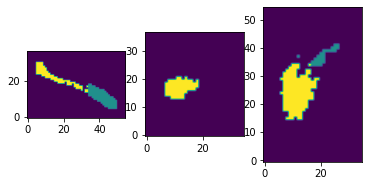

In [89]:
# This is what the labels look like from all 3 (sagittal, coronal, and axial) planes.

# Function taken from nibabel documentation: https://nipy.org/nibabel/coordinate_systems.html
def show_slices(slices, cmap=plt.rcParams["image.cmap"]):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, origin="lower", cmap=cmap)
        
        
show_slices([label_image[label_image.shape[0]//2, :, :],
            label_image[:, label_image.shape[1]//2, :],
            label_image[:, :, label_image.shape[2]//2]])

The corresponding raw image slices are shown below:

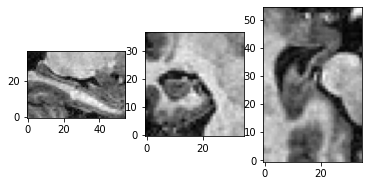

In [92]:
image = single_image.get_fdata()
show_slices([image[image.shape[0]//2, :, :],
            image[:, image.shape[1]//2, :],
            image[:, :, image.shape[2]//2]], cmap='gray')

So the labels are masks and each pixel is 1x1x1 mm (based on pixdim), or 1mm^3. We can sum up all the pixels that match the hippocampus area. Plot a with a colour bar to see what is the background pixel value.

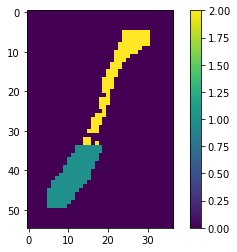

In [93]:
plt.imshow(label_image[label_image.shape[0]//2,:,:], interpolation='nearest')
plt.colorbar()

We see the background has a pixel value of 0 and anything in the hippocampus is either 1 or 2. Thus, to get the volume of the hippocampus, sum everything that is not the background.

In [94]:
print(f'Volume: {np.sum(label_image > 0)} mm^3')

Volume: 3581 mm^3


## Plotting some charts

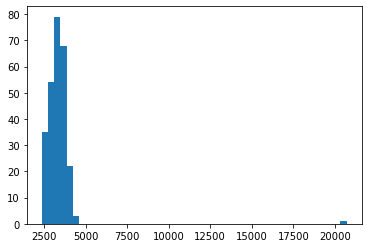

In [95]:
# TASK: Plot a histogram of all volumes that we have in our dataset and see how 
# our dataset measures against a slice of a normal population represented by the chart below.

all_volumes = np.array([np.sum(labels[img_filename].get_fdata() > 0) for img_filename in labels])
plt.hist(all_volumes, bins=50);

We have an outlier volume of 20702 at index 200.

In [96]:
np.where(all_volumes==20702)

(array([200]),)

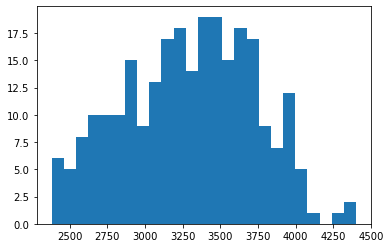

In [98]:
all_volumes = np.delete(all_volumes, [200, 240]) # remove the outlier volumes... much nicer histogram!
plt.hist(all_volumes, bins=25); 

Across the board we have a smaller hippocampal volume by about 500-600 mm^3 indicating some abnormality (alzheimer's in this case)

In [99]:
percentiles = [2.5, 5, 10, 25, 50, 75, 90, 95, 97.5]
for p in percentiles:
    vol = np.percentile(all_volumes, p)
    print(f'{p}th percentile volume = {vol}')

2.5th percentile volume = 2472.9
5th percentile volume = 2587.1
10th percentile volume = 2683.4
25th percentile volume = 2949.5
50th percentile volume = 3326.5
75th percentile volume = 3624.25
90th percentile volume = 3845.2
95th percentile volume = 3979.2
97.5th percentile volume = 4029.5249999999996


<img src="img/nomogram_fem_right.svg" width=400 align=left>

Do you see any outliers? Why do you think it's so (might be not immediately obvious, but it's always a good idea to inspect) outliers closer. If you haven't found the images that do not belong, the histogram may help you.

In the real world we would have precise information about the ages and conditions of our patients, and understanding how our dataset measures against population norm would be the integral part of clinical validation that we talked about in last lesson. Unfortunately, we do not have this information about this dataset, so we can only guess why it measures the way it is. If you would like to explore further, you can use the [calculator from HippoFit project](http://www.smanohar.com/biobank/calculator.html) to see how our dataset compares against different population slices

Did you notice anything odd about the label files? We hope you did! The mask seems to have two classes, labeled with values `1` and `2` respectively. If you visualized sagittal or axial views, you might have gotten a good guess of what those are. Class 1 is the anterior segment of the hippocampus and class 2 is the posterior one. 

For the purpose of volume calculation we do not care about the distinction, however we will still train our network to differentiate between these two classes and the background

In [113]:
# TASK: Copy the clean dataset to the output folder inside section1/out. You will use it in the next Section
to_copy_images = [("/data/TrainingSet/images/" + f) for f in dir_training_images if f not in remove]
to_copy_labels = [("/data/TrainingSet/labels/" + f) for f in dir_training_labels if f not in remove]

for f in to_copy_images:
    shutil.copy(f, 'out/data/TrainingSet/images')
    
for f in to_copy_labels:
    shutil.copy(f, 'out/data/TrainingSet/labels')

In [119]:
! cp -r /data/TestVolumes out/data/

In [120]:
! ls out/data

TestVolumes  TrainingSet


## Final remarks

Congratulations! You have finished Section 1. 

In this section you have inspected a dataset of MRI scans and related segmentations, represented as NIFTI files. We have visualized some slices, and understood the layout of the data. We have inspected file headers to understand what how the image dimensions relate to the physical world and we have understood how to measure our volume. We have then inspected dataset for outliers, and have created a clean set that is ready for consumption by our ML algorithm. 

In the next section you will create training and testing pipelines for a UNet-based machine learning model, run and monitor the execution, and will produce test metrics. This will arm you with all you need to use the model in the clinical context and reason about its performance!